# Assignment 2: Fully connected neural (FCN) networks
### This assignment is to implement fully connected neural networks for image classifications
### AI in geosciences, ESS1502
--------------------------------------------------------

## Task: Train and validate your FCN networks/models on the Fashion MNIST dataset. You are free to use Tensorflow, Keras, or Pytorch to implement your networks.
--------------------------------------------------------

## Grading rules:
* finish all the steps of 1) loading and visualizing/verifying the training/testing datasets; 2) build your network; 3) train the network; 4) validate the trained network on the testing dataset; 5) make predictions on the testing datasets and visuzlize the prediction results
* performance of your model/network (validation scores)

## Extra credits:
* provide an evaluation of the hyperparameters (number of layers, number of features at each layer, learning rate and so on), how these hyperparameters affect the performance?
* implement your networks on multiple platforms (Tensorflow, Keras, Pytorch)
--------------------------------------------------------

## Load the Fashion MNIST dataset

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 1.1) Visualize/verify 10 of the training datasets including the input images and the corresponding labels

In [2]:
#write your codes here
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
train_images = train_images / 255.0

test_images = test_images / 255.0

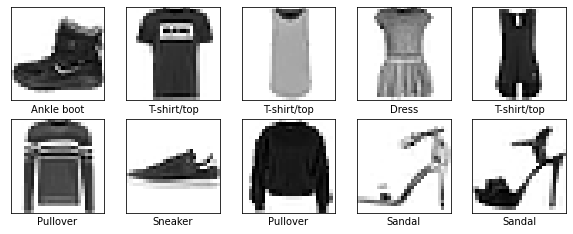

In [4]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 1.2) Visualize/verify 10 of the testing datasets including the input images and the corresponding labels

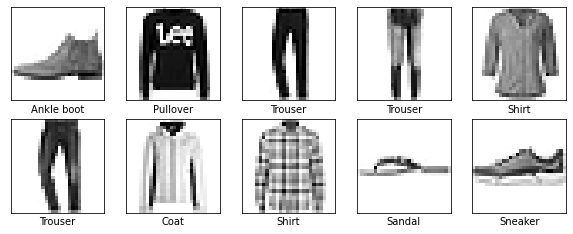

In [5]:
#write your codes here
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

# 2) Build your network

In [6]:
#write your codes here
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 3) Train your network

In [8]:
#write your codes here
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6014 - accuracy: 0.7882
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3688 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3222 - accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.8884
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.8954
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2634 - accuracy: 0.9022
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2539 - accuracy: 0.9047
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - accuracy: 0.9083
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2332 - accuracy: 0.9125
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.222

# 4) Validate the trained network on the testing dataset

In [9]:
#write your codes here
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3240 - accuracy: 0.8893

Test accuracy: 0.8892999887466431


# 5) Vake predictions on the testing datasets and visualize the prediction results

In [10]:
#write your codes here
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_images)

In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

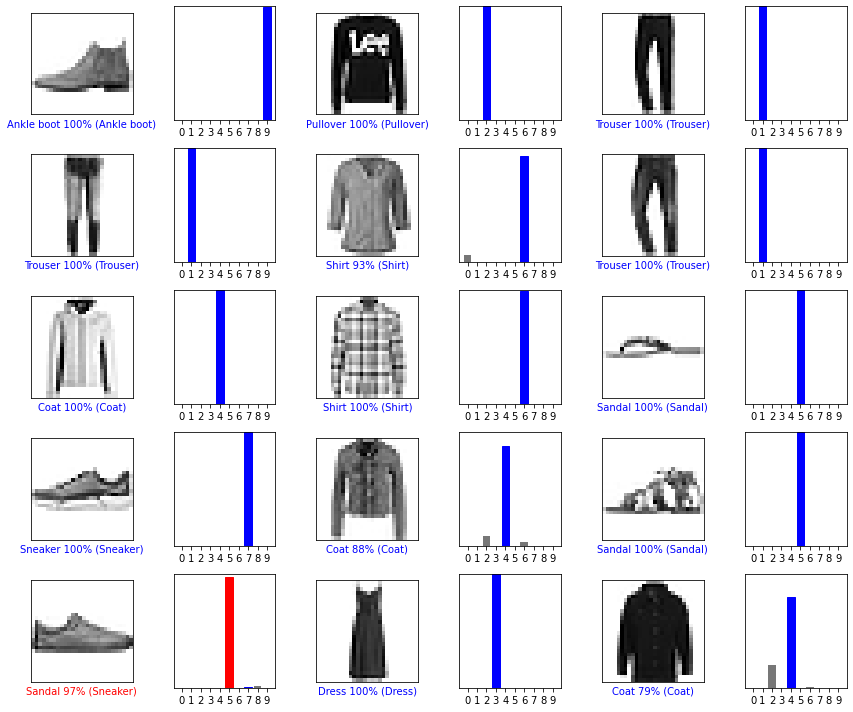

In [13]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()